In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd

fetch_housing_data()
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

In [4]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11139,-117.96,33.85,36.0,1951.0,365.0,1254.0,358.0,4.8438,185700.0,<1H OCEAN
4897,-118.25,34.01,31.0,1301.0,403.0,1952.0,377.0,2.1466,100800.0,<1H OCEAN
7811,-118.10,33.89,36.0,769.0,142.0,498.0,137.0,4.7159,182100.0,<1H OCEAN
14148,-117.08,32.73,36.0,1158.0,218.0,619.0,233.0,3.6125,122500.0,NEAR OCEAN
11369,-117.98,33.71,24.0,2308.0,464.0,1101.0,407.0,4.4766,230000.0,<1H OCEAN


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029315657A48>,
      dtype=object)

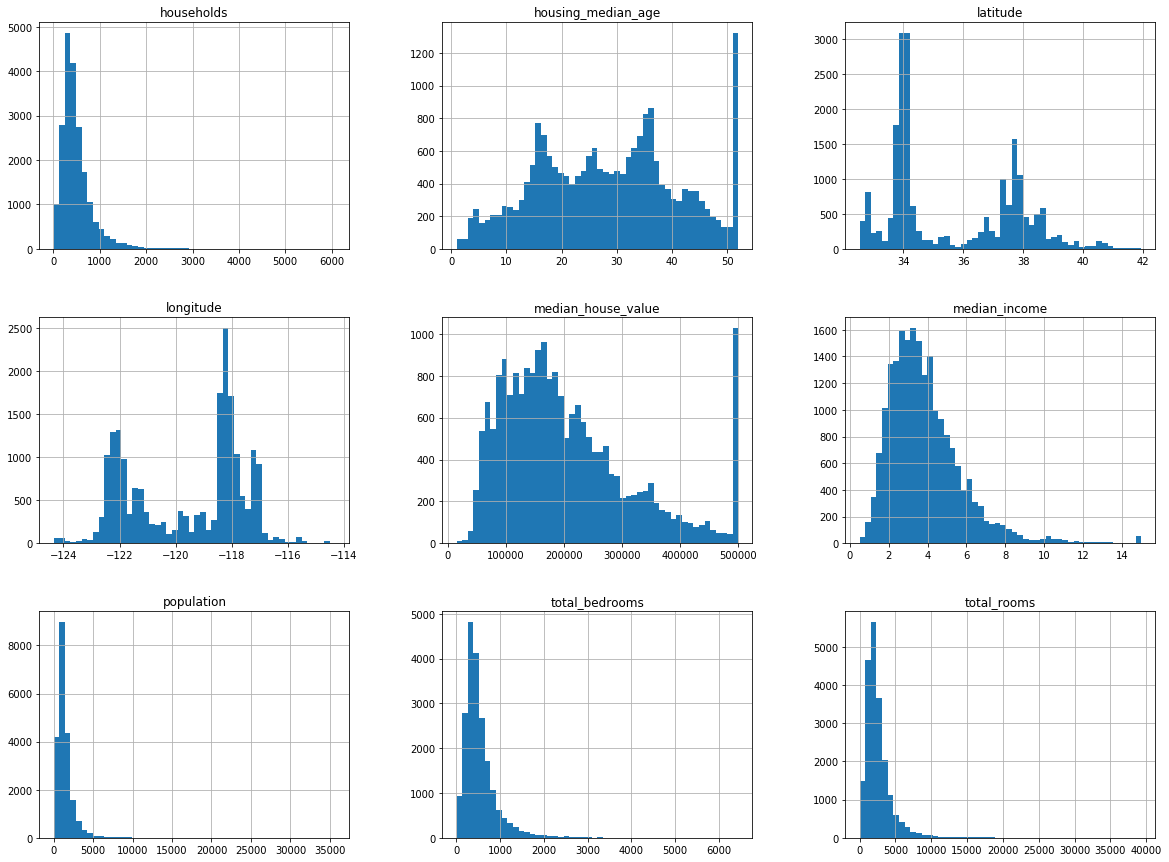

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
housing.hist(bins=50, figsize=(20,15))

In [9]:
import numpy as np

housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit as sss

split = sss(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
for set in (strat_train_set, strat_test_set):
    set.drop('income_cat', axis=1, inplace=True)

In [12]:
housing = strat_train_set.copy()

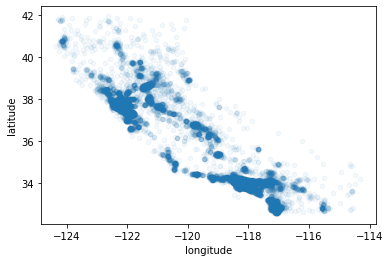

In [13]:
housing.plot.scatter(x='longitude', y='latitude', alpha=0.05)

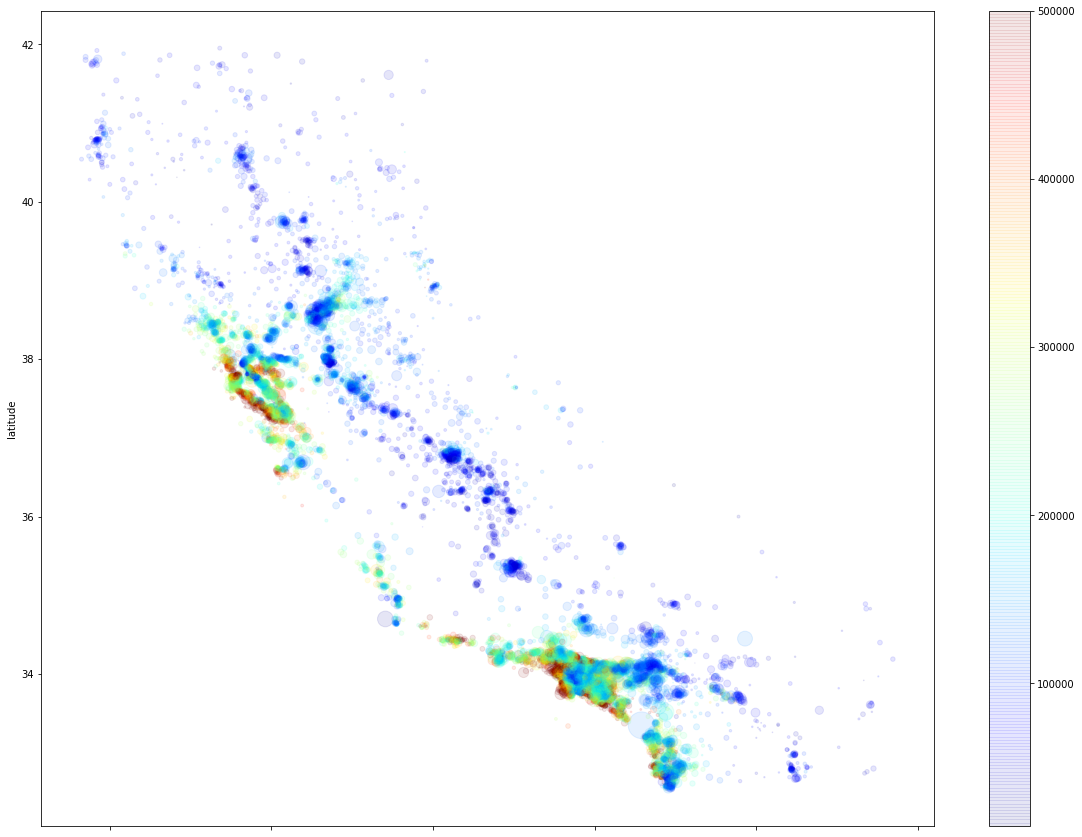

In [14]:
housing.plot.scatter(x='longitude', y='latitude', alpha=0.1,
    s=housing['population'] / 50, c=housing['median_house_value'], cmap=plt.get_cmap('jet'), figsize=(20,15))

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [17]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002931B349888>,
      dtype=object)

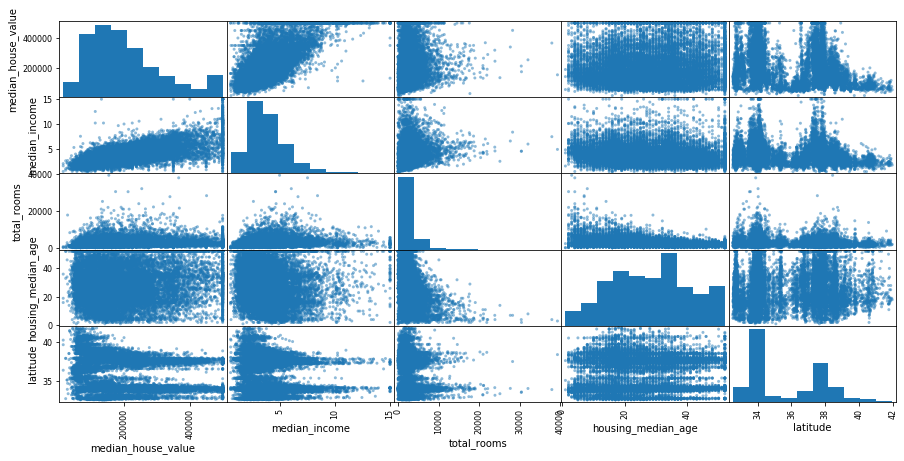

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'latitude']

scatter_matrix(housing[attributes], figsize=(15,7))

In [19]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix["median_house_value"]

longitude                  -0.047432
latitude                   -0.142724
housing_median_age          0.114110
total_rooms                 0.135097
total_bedrooms              0.047689
population                 -0.026920
households                  0.064506
median_income               0.687160
median_house_value          1.000000
rooms_per_household         0.146285
bedrooms_per_household     -0.259984
population_per_household   -0.021985
Name: median_house_value, dtype: float64

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [25]:
X = imputer.transform(housing_num)

In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [27]:
housing_cat = housing["ocean_proximity"]

In [28]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
print('housing_cat_encoded:', housing_cat_encoded)
print('housing_categories:', housing_categories)

housing_cat_encoded: [0 0 1 ... 2 0 3]
housing_categories: Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')


In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [30]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [31]:
housing_cat_1hot2 = encoder.fit_transform(np.array(housing_cat).reshape(-1,1))

In [32]:
housing_cat_1hot = housing_cat_1hot2

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # 特にすることはないので自分を返す
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [34]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [36]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(list(housing_num))),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [38]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(['ocean_proximity'])),
    ('cat_ecoder', OneHotEncoder(sparse=False))
])

In [39]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [43]:
housing_prepared = full_pipeline.fit_transform(housing)

In [44]:
housing_prepared.shape

(16512, 16)

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [48]:
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [50]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [53]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [55]:
import math

math.sqrt(lin_mse)

68628.19819848923

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predicitons = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predicitons, housing_labels)

In [59]:
math.sqrt(tree_mse)

0.0

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69059.00671273, 69236.71567267, 71665.96036151, 69045.10983965,
       70415.71512414, 76009.36879943, 70941.88475875, 70648.3579401 ,
       75518.92157337, 69725.61725823])

In [64]:
np.mean(tree_rmse_scores)

71226.66580405967

In [65]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
np.mean(lin_rmse_scores)

69052.46136345083

In [67]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg.predict(housing_prepared)

C:\Users\kushida.teppei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([277210. , 335690. , 217260. , ..., 103790. , 214270. , 469440.7])

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 100], 'max_features': [2, 3, 4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [71]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}

In [74]:
best_estimator = grid_search.best_estimator_

In [77]:
scores = cross_val_score(best_estimator, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
np.mean(tree_rmse_scores)

48568.52112830561

In [81]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(params, np.sqrt(-mean_score))

{'max_features': 2, 'n_estimators': 3} 63825.544339355976
{'max_features': 2, 'n_estimators': 10} 55907.284263943366
{'max_features': 2, 'n_estimators': 30} 52763.606868192706
{'max_features': 2, 'n_estimators': 100} 51795.62444493715
{'max_features': 4, 'n_estimators': 3} 60713.39991079119
{'max_features': 4, 'n_estimators': 10} 53152.285539410455
{'max_features': 4, 'n_estimators': 30} 50589.087568902105
{'max_features': 4, 'n_estimators': 100} 49820.16495045787
{'max_features': 6, 'n_estimators': 3} 59975.16199282961
{'max_features': 6, 'n_estimators': 10} 51710.564818590705
{'max_features': 6, 'n_estimators': 30} 50092.013614881216
{'max_features': 6, 'n_estimators': 100} 49183.57550877462
{'max_features': 8, 'n_estimators': 3} 58878.489127927045
{'max_features': 8, 'n_estimators': 10} 52198.64250502421
{'max_features': 8, 'n_estimators': 30} 50217.06374532578
{'max_features': 8, 'n_estimators': 100} 49285.79049884981
{'bootstrap': False, 'max_features': 2, 'n_estimators': 3} 62456

In [84]:
imp = best_estimator.feature_importances_

In [86]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [89]:
for a, b in zip(housing.columns, imp):
    print(a, b)

longitude 0.0838999326776709
latitude 0.08479369965997136
housing_median_age 0.042845002449657325
total_rooms 0.023426535991890242
total_bedrooms 0.01939277675311226
population 0.022459059156319676
households 0.019661058291848946
median_income 0.2816768090512029
ocean_proximity 0.06913154573512777
